# Pair Trading Strategy

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
symbols = ['JACK', 'MCD', 'WING', 'WEN', 'LOCO', 'SONC', 'TACO', 'DPZ']

In [3]:
start = '2019-01-01' 
end = '2020-01-01'

In [4]:
data = pdr.get_data_yahoo(symbols, start, end)['Adj Close']

In [5]:
data.head(10)

Symbols,JACK,MCD,WING,WEN,LOCO,TACO,DPZ,SONC
Date,,,,,,,,
2019-01-02,74.767441,165.785156,58.632019,14.968010,14.960000,10.187848,238.287354,NaN
2019-01-03,75.371323,164.692841,57.823109,14.891447,14.730000,9.920008,234.751755,NaN
2019-01-04,77.230934,167.875580,59.678852,15.226410,15.130000,10.346568,238.581177,NaN
2019-01-07,78.064880,169.702393,64.170723,15.465670,15.860000,10.584648,241.352890,NaN
2019-01-08,77.547249,170.060226,66.873444,15.609222,16.190001,10.753289,237.219833,NaN
2019-01-09,77.834816,169.768311,67.701385,15.685786,16.100000,10.872328,241.509598,NaN
2019-01-10,77.528076,170.954742,65.712402,15.752775,16.330000,10.485448,241.117828,NaN
2019-01-11,77.978600,171.726898,66.606972,15.810200,16.330000,10.019208,243.860153,NaN
2019-01-14,77.691040,170.644012,63.932796,15.724067,16.320000,10.654088,239.139465,NaN


In [7]:
data.columns

Index(['JACK', 'MCD', 'WING', 'WEN', 'LOCO', 'TACO', 'DPZ', 'SONC'], dtype='object', name='Symbols')

In [8]:
data.describe()

Symbols,JACK,MCD,WING,WEN,LOCO,TACO,DPZ,SONC
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,0.0
mean,79.061294,188.849761,78.319923,18.641268,12.786091,10.170527,259.903289,NaN
std,4.572841,12.768879,10.436556,1.767761,2.224810,1.510533,18.914050,NaN
min,69.542877,163.817123,57.823109,14.891447,9.750000,6.934085,218.950272,NaN
25%,75.530083,179.230991,70.020788,17.265284,10.940000,9.783608,242.795086,NaN
50%,77.846035,188.517799,76.879162,18.722548,12.135000,10.386249,260.843414,NaN
75%,82.594805,201.054733,86.510254,20.119985,15.050000,11.142648,276.879349,NaN
max,89.863388,210.838211,101.315887,22.156780,18.440001,13.253129,293.396301,NaN


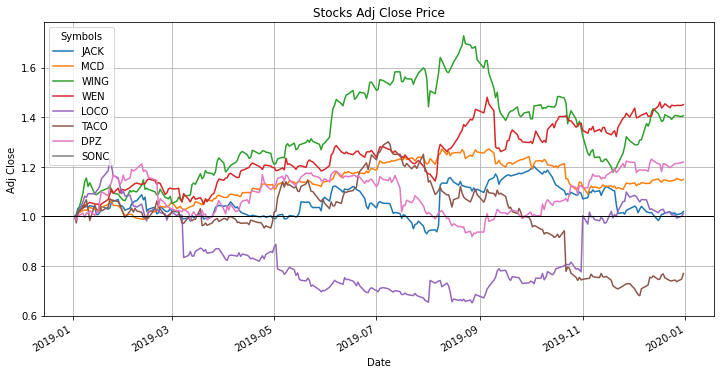

In [9]:
#for symbol in symbols:
    # df = pdr.get_data_yahoo(symbols, start, end)['Adj Close']
normalize_stocks = data.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(12,6)).axhline(1, lw=1, color='black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid()
plt.title("Stocks Adj Close Price")
plt.show()

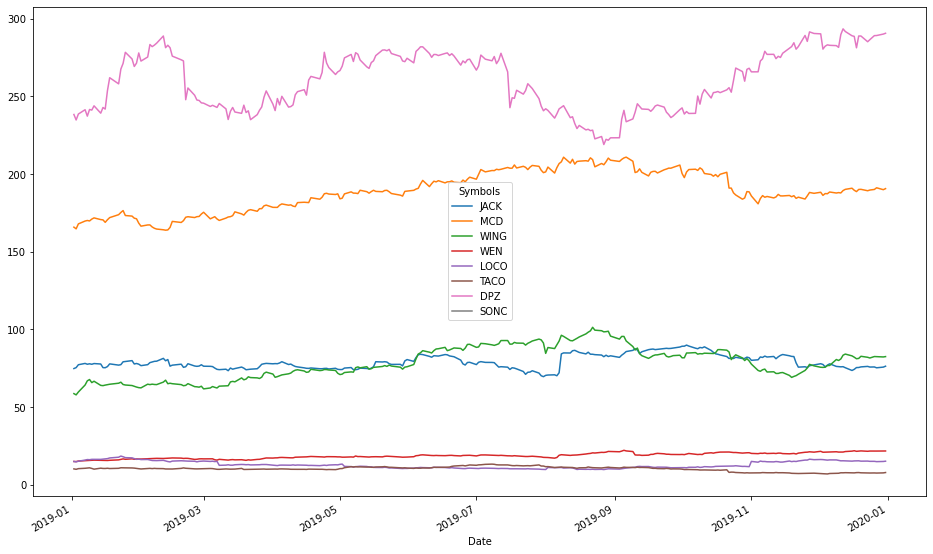

In [10]:
data.plot(figsize=(16,10))

In [11]:
# ['JACK', 'MCD', 'WING', 'WEN', 'LOCO', 'SONC', 'TACO', 'DPZ']
corr_rest = data.corr()
corr_rest

Symbols,JACK,MCD,WING,WEN,LOCO,TACO,DPZ,SONC
Symbols,,,,,,,,
JACK,1.000000,0.424477,0.355271,0.422008,-0.274771,-0.057307,-0.226172,NaN
MCD,0.424477,1.000000,0.946166,0.644177,-0.761047,0.284849,-0.248848,NaN
WING,0.355271,0.946166,1.000000,0.645876,-0.746465,0.302891,-0.193565,NaN
WEN,0.422008,0.644177,0.645876,1.000000,-0.215463,-0.430579,0.231675,NaN
LOCO,-0.274771,-0.761047,-0.746465,-0.215463,1.000000,-0.574013,0.380540,NaN
TACO,-0.057307,0.284849,0.302891,-0.430579,-0.574013,1.000000,-0.333049,NaN
DPZ,-0.226172,-0.248848,-0.193565,0.231675,0.380540,-0.333049,1.000000,NaN
SONC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pair_value = corr_rest.abs().unstack()
pair_value.sort_values(ascending = False)

Symbols  Symbols
DPZ      DPZ        1.0
TACO     TACO       1.0
MCD      MCD        1.0
WING     WING       1.0
LOCO     LOCO       1.0
                   ... 
SONC     WEN        NaN
         LOCO       NaN
         TACO       NaN
         DPZ        NaN
         SONC       NaN
Length: 64, dtype: float64

In [13]:
corr_rest['JACK'].sort_values(ascending=False)

Symbols
JACK    1.000000
MCD     0.424477
WEN     0.422008
WING    0.355271
TACO   -0.057307
DPZ    -0.226172
LOCO   -0.274771
SONC         NaN
Name: JACK, dtype: float64

In [14]:
corr_rest['MCD'].sort_values(ascending=False)

Symbols
MCD     1.000000
WING    0.946166
WEN     0.644177
JACK    0.424477
TACO    0.284849
DPZ    -0.248848
LOCO   -0.761047
SONC         NaN
Name: MCD, dtype: float64

In [15]:
corr_rest['WING'].sort_values(ascending=False)

Symbols
WING    1.000000
MCD     0.946166
WEN     0.645876
JACK    0.355271
TACO    0.302891
DPZ    -0.193565
LOCO   -0.746465
SONC         NaN
Name: WING, dtype: float64

In [16]:
corr_rest['WEN'].sort_values(ascending=False)

Symbols
WEN     1.000000
WING    0.645876
MCD     0.644177
JACK    0.422008
DPZ     0.231675
LOCO   -0.215463
TACO   -0.430579
SONC         NaN
Name: WEN, dtype: float64

In [17]:
corr_rest['LOCO'].sort_values(ascending=False)

Symbols
LOCO    1.000000
DPZ     0.380540
WEN    -0.215463
JACK   -0.274771
TACO   -0.574013
WING   -0.746465
MCD    -0.761047
SONC         NaN
Name: LOCO, dtype: float64

In [18]:
corr_rest['SONC'].sort_values(ascending=False)

Symbols
JACK   NaN
MCD    NaN
WING   NaN
WEN    NaN
LOCO   NaN
TACO   NaN
DPZ    NaN
SONC   NaN
Name: SONC, dtype: float64

In [19]:
corr_rest['TACO'].sort_values(ascending=False)

Symbols
TACO    1.000000
WING    0.302891
MCD     0.284849
JACK   -0.057307
DPZ    -0.333049
WEN    -0.430579
LOCO   -0.574013
SONC         NaN
Name: TACO, dtype: float64

In [20]:
corr_rest['DPZ'].sort_values(ascending=False)

Symbols
DPZ     1.000000
LOCO    0.380540
WEN     0.231675
WING   -0.193565
JACK   -0.226172
MCD    -0.248848
TACO   -0.333049
SONC         NaN
Name: DPZ, dtype: float64

In [47]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(corr_rest, figsize=(16,12), alpha=0.3)

ModuleNotFoundError: No module named 'pandas.tools'

In [48]:
# Returns
for symbol in symbols:
    returns = data.pct_change()
returns.head()

Symbols,JACK,MCD,WING,WEN,LOCO,TACO,DPZ,SONC
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.008077,-0.006589,-0.013796,-0.005115,-0.015374,-0.026290,-0.014838,NaN
2019-01-04,0.024673,0.019325,0.032093,0.022494,0.027156,0.043000,0.016313,NaN
2019-01-07,0.010798,0.010882,0.075267,0.015713,0.048248,0.023011,0.011617,NaN
2019-01-08,-0.006631,0.002109,0.042118,0.009282,0.020807,0.015933,-0.017125,NaN


In [23]:
returns = returns.dropna()

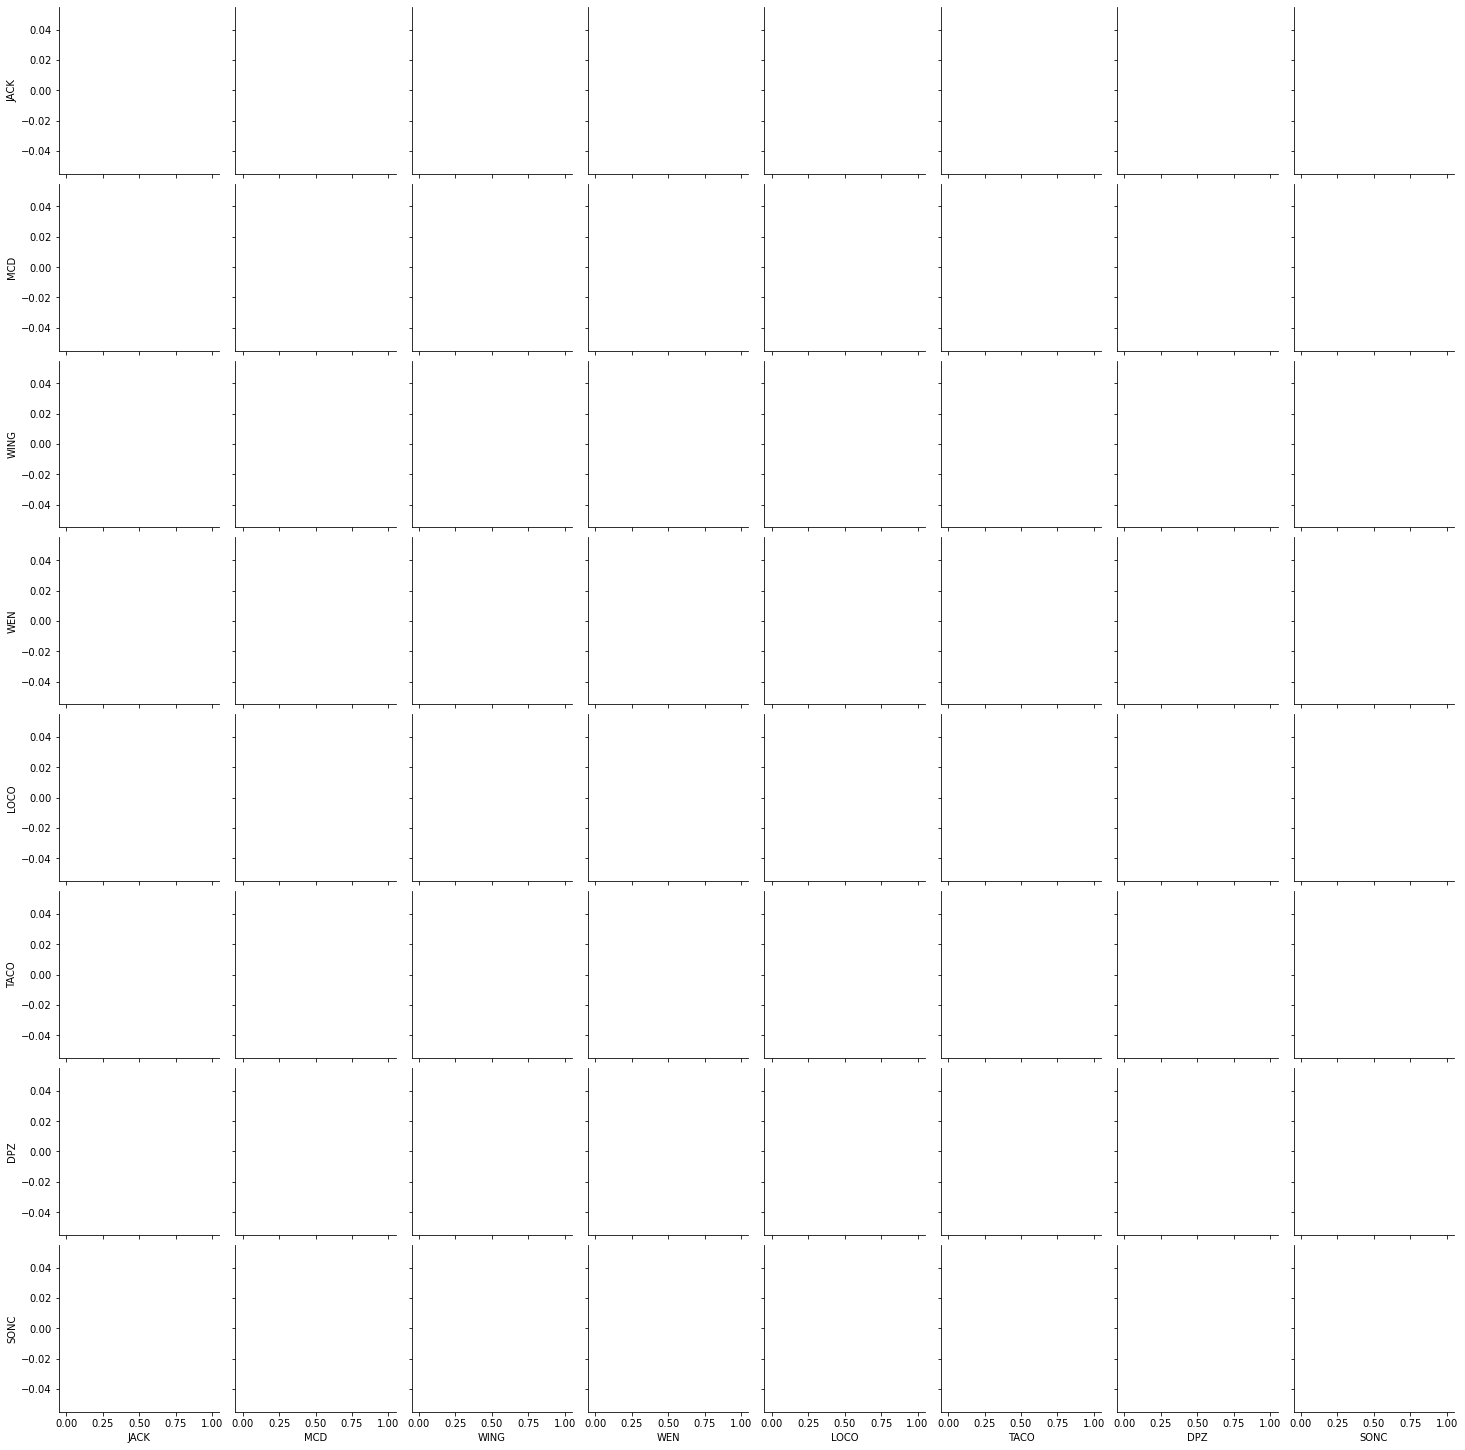

In [24]:
sns.pairplot(returns[1:])

In [26]:
# Worst Single Day Returns
returns.idxmin()

ValueError: attempt to get argmin of an empty sequence

In [27]:
# Best Single Day Gain
returns.idxmax()

ValueError: attempt to get argmax of an empty sequence

In [28]:
returns.std()

Symbols
JACK   NaN
MCD    NaN
WING   NaN
WEN    NaN
LOCO   NaN
TACO   NaN
DPZ    NaN
SONC   NaN
dtype: float64

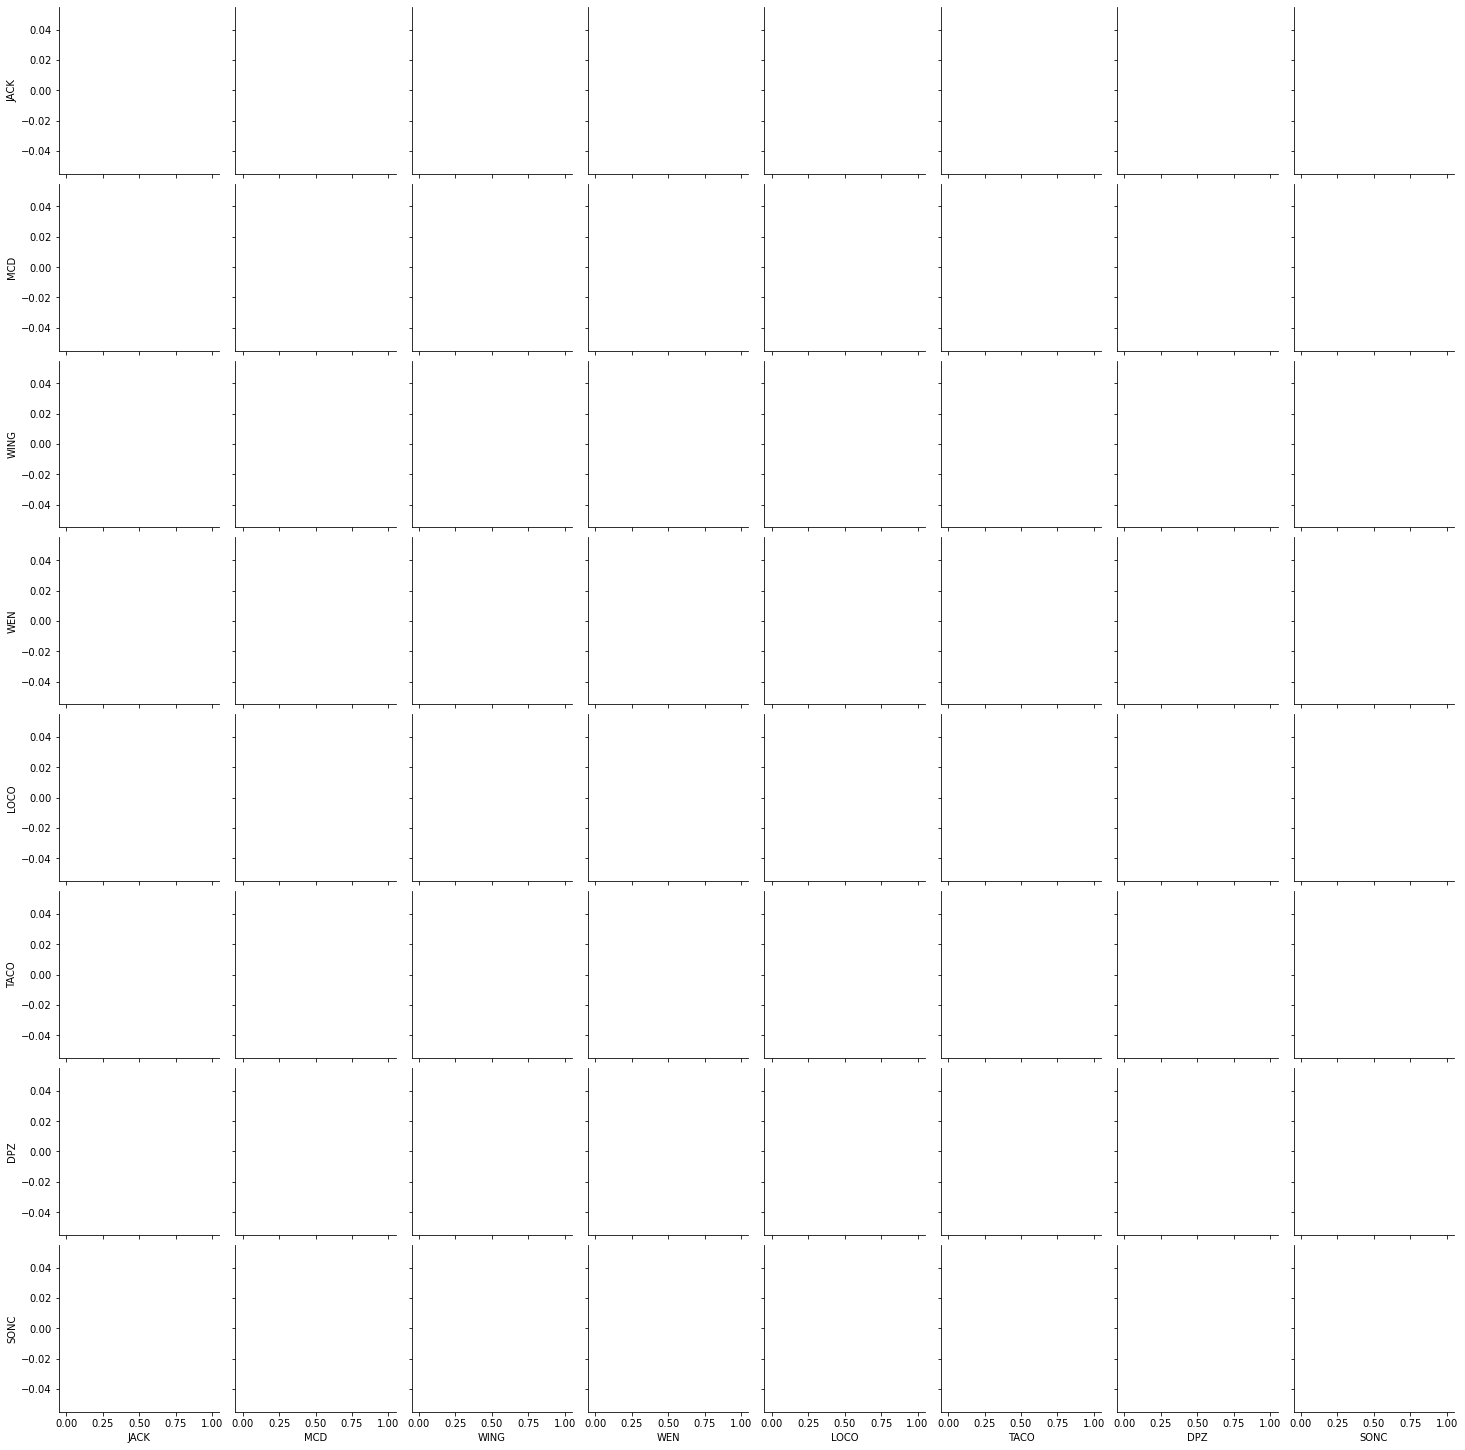

In [29]:
sns.pairplot(returns.dropna())

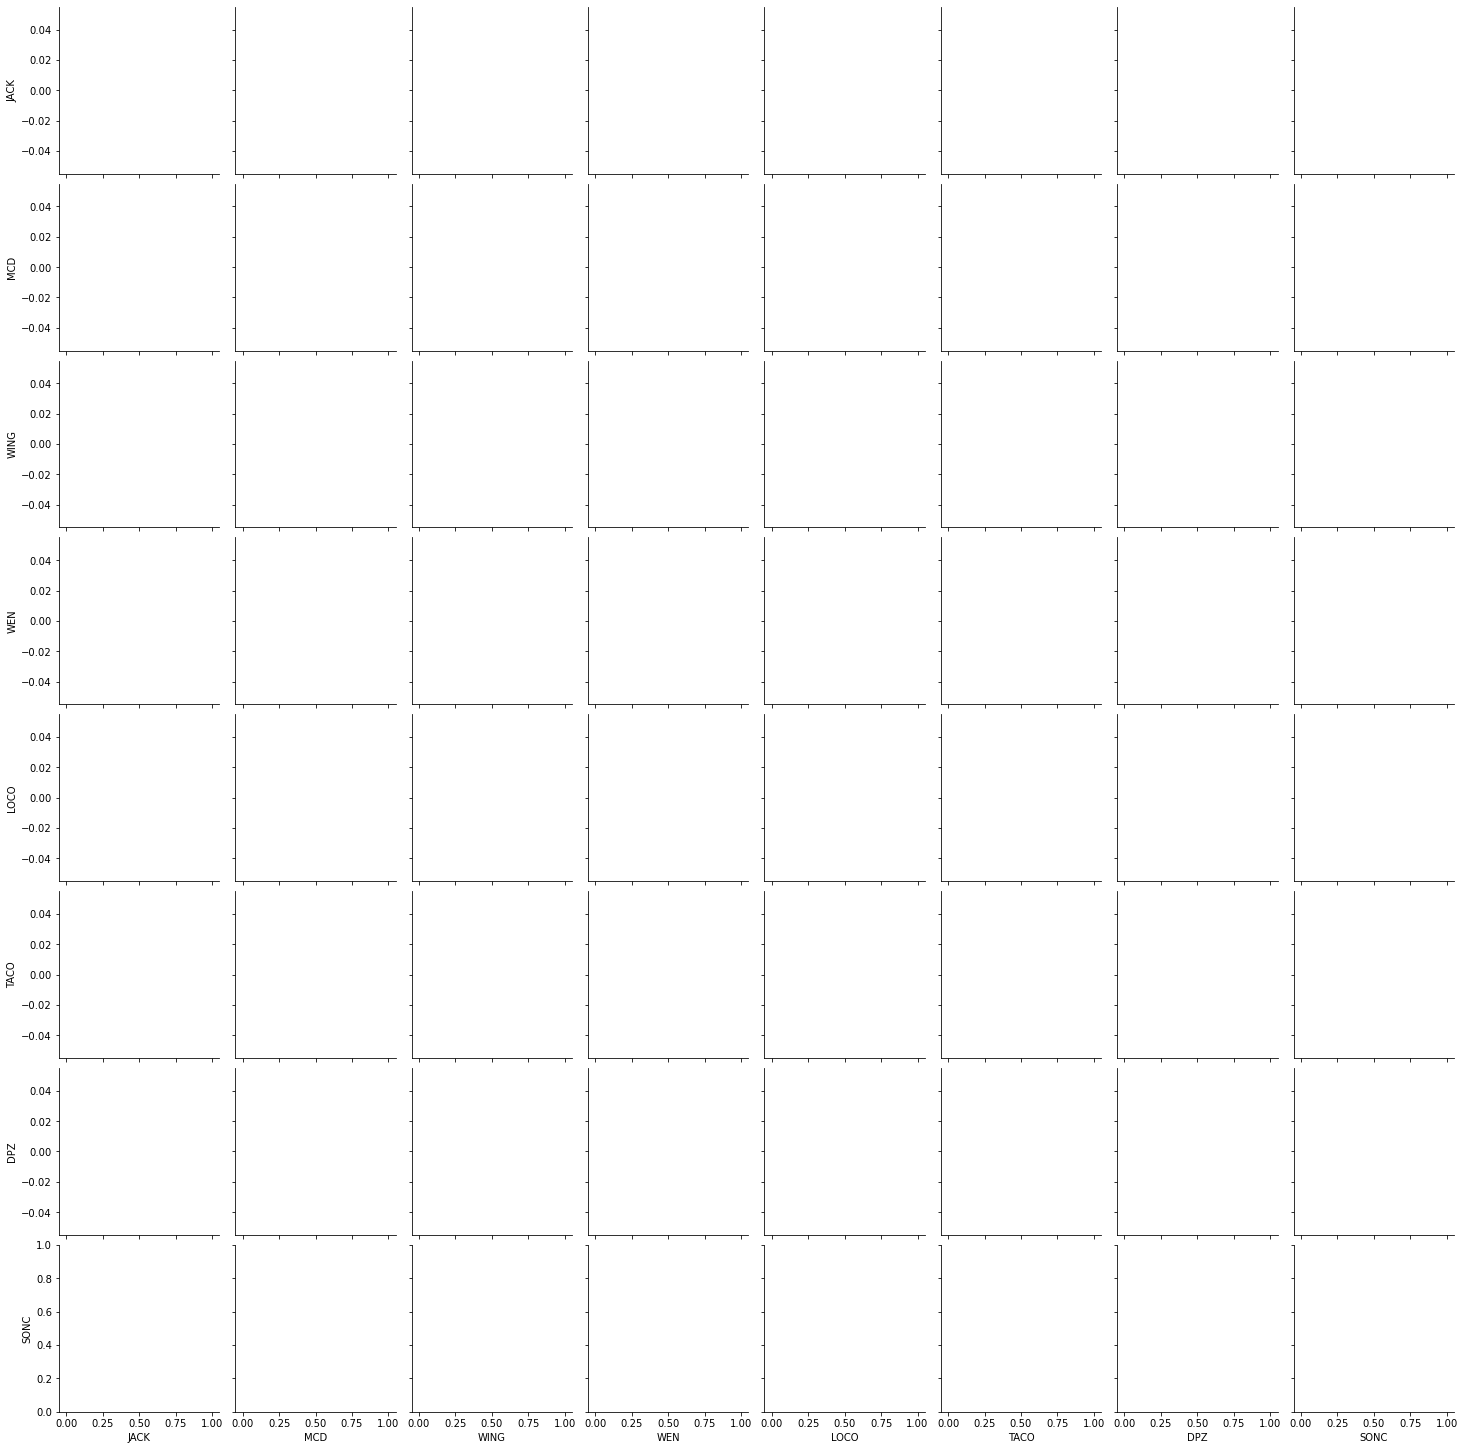

In [30]:
returns_fig = sns.PairGrid(returns.dropna())

# Using map_upper to specify upper triangle scatter plots.
returns_fig.map_upper(plt.scatter,color='seagreen',alpha=0.5)

# Using lower triangle for kde plot
returns_fig.map_lower(sns.kdeplot,cmap='coolwarm')

# diagonal will be a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30, alpha=0.6)

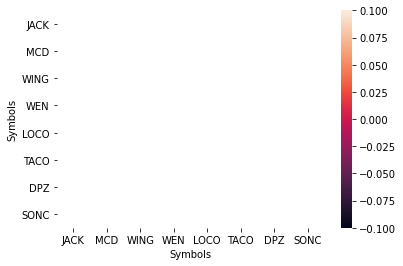

In [34]:
sns.heatmap(returns.corr(),annot=True)

In [35]:
rest_rets = returns.corr()
rest_rets

Symbols,JACK,MCD,WING,WEN,LOCO,TACO,DPZ,SONC
Symbols,,,,,,,,
JACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TACO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DPZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SONC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Plot Scatter Matrix
scatter_matrix(rest_rets, figsize=(16,10))
plt.show()

NameError: name 'scatter_matrix' is not defined

In [36]:
rest_rets.hist(bins=15, figsize=(16,12)

SyntaxError: unexpected EOF while parsing (<ipython-input-36-35ad07e00cd7>, line 1)

In [37]:
rets = returns.dropna()

area = np.pi*20
plt.figure(figsize=(16,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot
plt.ylim([0.0,0.05])
plt.xlim([0.0,0.02])

#Set the plot titles for x and y axis
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title("Risk vs. Expected Returns")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

StopIteration: 

<Figure size 1152x576 with 1 Axes>

In [38]:
rest_rets = returns.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

Symbols  Symbols
JACK     JACK      NaN
         MCD       NaN
         WING      NaN
         WEN       NaN
         LOCO      NaN
                    ..
SONC     WEN       NaN
         LOCO      NaN
         TACO      NaN
         DPZ       NaN
         SONC      NaN
Length: 64, dtype: float64

In [39]:
# Normalized Returns Data
Normalized_Value = ((returns[:] - returns[:].min()) /(returns[:].max() - returns[:].min()))
Normalized_Value.head

<bound method NDFrame.head of Empty DataFrame
Columns: [JACK, MCD, WING, WEN, LOCO, TACO, DPZ, SONC]
Index: []>

In [40]:
Normalized_Value.corr()

Symbols,JACK,MCD,WING,WEN,LOCO,TACO,DPZ,SONC
Symbols,,,,,,,,
JACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TACO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DPZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SONC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

Symbols  Symbols
JACK     JACK      NaN
         MCD       NaN
         WING      NaN
         WEN       NaN
         LOCO      NaN
                    ..
SONC     WEN       NaN
         LOCO      NaN
         TACO      NaN
         DPZ       NaN
         SONC      NaN
Length: 64, dtype: float64

In [42]:
stocks = ['DPS', 'KO', 'PEP', 'FIZZ']

In [43]:
relate_industry = pdr.get_data_yahoo(stocks, start, end)["Adj Close"]

In [44]:
relate_industry.head()

Symbols,KO,PEP,FIZZ,DPS
Date,,,,
2019-01-02,43.620419,101.566902,34.184769,NaN
2019-01-03,43.350868,100.618919,34.438408,NaN
2019-01-04,44.215286,102.682220,34.142498,NaN
2019-01-07,43.639008,101.799255,34.856438,NaN
2019-01-08,44.131630,102.775154,37.214336,NaN


In [45]:
relate_industry.describe()

Symbols,KO,PEP,FIZZ,DPS
count,252.000000,252.000000,252.000000,0.0
mean,47.945411,120.624541,25.011564,NaN
std,3.480171,9.416709,5.594675,NaN
min,41.538387,99.745262,18.736334,NaN
25%,44.441883,114.193815,20.794795,NaN
50%,48.809416,123.578518,23.128030,NaN
75%,51.248382,128.718529,27.007751,NaN
max,53.076775,133.313416,39.506470,NaN


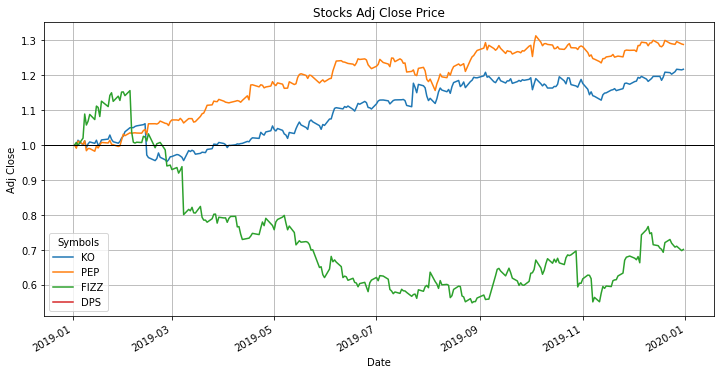

In [46]:
#for stock in stocks:
    # df = pdr.get_data_yahoo(symbols, start, end)['Adj Close']
normalize_stocks = relate_industry.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(12,6)).axhline(1, lw=1, color='black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid()
plt.title("Stocks Adj Close Price")
plt.show()